# Heart failure model

Information about the data:


    1.Sex - Gender of patient Male = 1, Female =0
    2.Age - Age of patient
    3.Diabetes - 0 = No, 1 = Yes
    4.Anaemia - 0 = No, 1 = Yes
    5.High_blood_pressure - 0 = No, 1 = Yes
    6.Smoking - 0 = No, 1 = Yes
    7.DEATH_EVENT - 0 = No, 1 = Yes
 



### There are some factors that affects Death Event. This dataset contains person's information like age ,sex , blood pressure, smoke, diabetes,ejection fraction, creatinine phosphokinase, serum_creatinine, serum_sodium, time and we have to predict their DEATH EVENT.

#### Requirements

In [ ]:
#Regular EDA
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


#Evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve


#Models
import xgboost as xgb
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from joblib import dump, load
  




## Importing the data 

In [ ]:
data = pd.read_csv("heart_failure.csv")

## EDA(explorotary data analysis)

In [ ]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
print(f"the size of the data is: {data.size}. and the shape of the dataset is: {data.shape}" )

the size of the data is: 3887. and the shape of the dataset is: (299, 13)


In [ ]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In this dataset we don't need the time feature because it's not necessary and irrelevant!
So we are just gonna drop it

In [ ]:
data.drop("time",axis=1,inplace=True)

Let's find out the unique values in our dataset!

In [ ]:
data.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
DEATH_EVENT                   2
dtype: int64

Let's see the AGE columns distribution

0    203
1     96
Name: DEATH_EVENT, dtype: int64


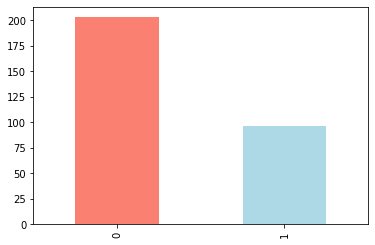

In [ ]:
data["DEATH_EVENT"].value_counts().plot(kind='bar',color=["salmon","lightblue"]);
print(data.DEATH_EVENT.value_counts())


As we can see there is a data imbalance in the dataset!

For this we will use oversampling technique to balance our data!

In [ ]:
! pip install imblearn

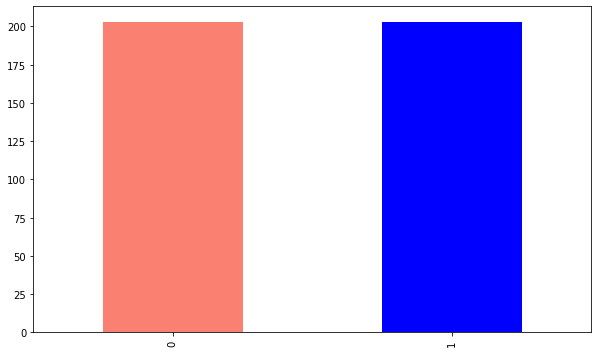

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
##we have to define the x(feature variable) and the y(target variable)
x = data.iloc[:,:-1]
y = data.iloc[:,-1]
# fitting the predictor and the target variable
x_ros,y_ros = ros.fit_resample(x,y)
y_ros.value_counts().plot(kind="bar",color=["salmon","blue"],figsize=(10,6));

Let's focus on our EDA now!

Releaition between the the age and DEATH_EVENT

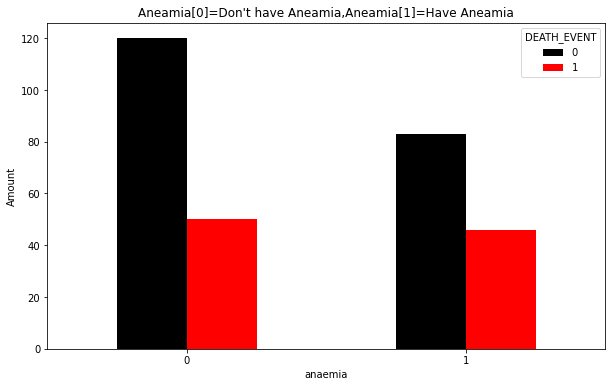

In [ ]:
pd.crosstab(data.anaemia,data.DEATH_EVENT).plot(kind="bar",color=["black","red"],figsize=(10,6));
plt.ylabel("Amount")
plt.title("Aneamia[0]=Don't have Aneamia,Aneamia[1]=Have Aneamia")

plt.xticks(rotation= 0);

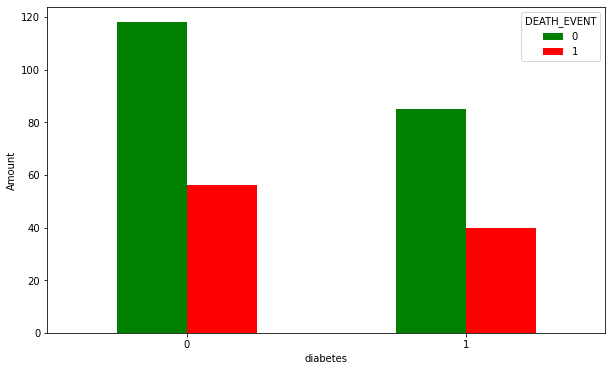

In [ ]:
pd.crosstab(data.diabetes,data.DEATH_EVENT).plot(kind="bar",color=["green","red"],figsize=(10,6));
plt.ylabel("Amount")
plt.xticks(rotation= 0);

### The corr() matrix

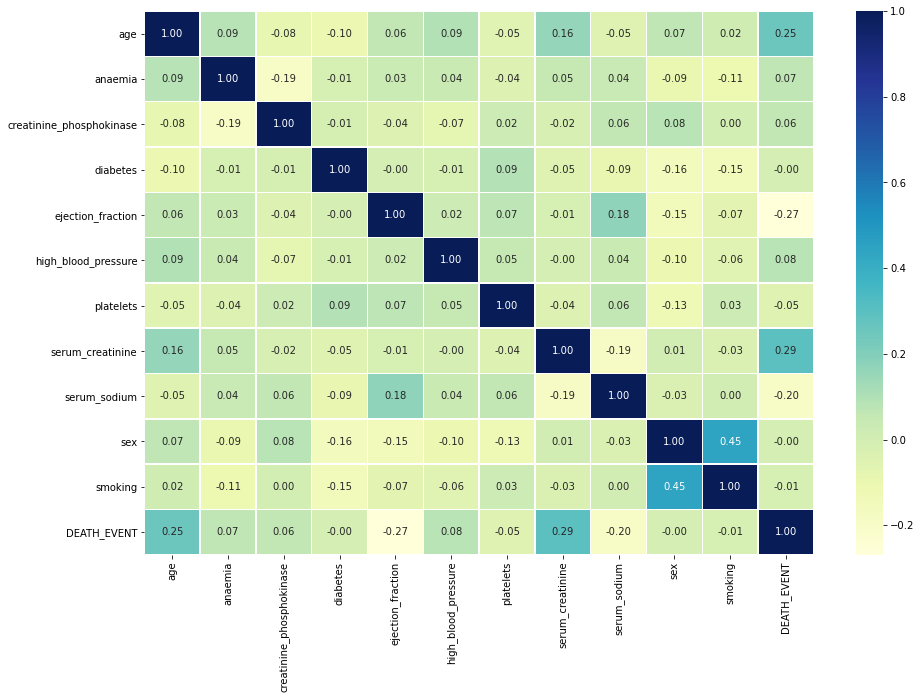

In [ ]:
corr_matrix= data.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
annot=True,
linewidths=0.5,
fmt = ".2f",
cmap="YlGnBu");

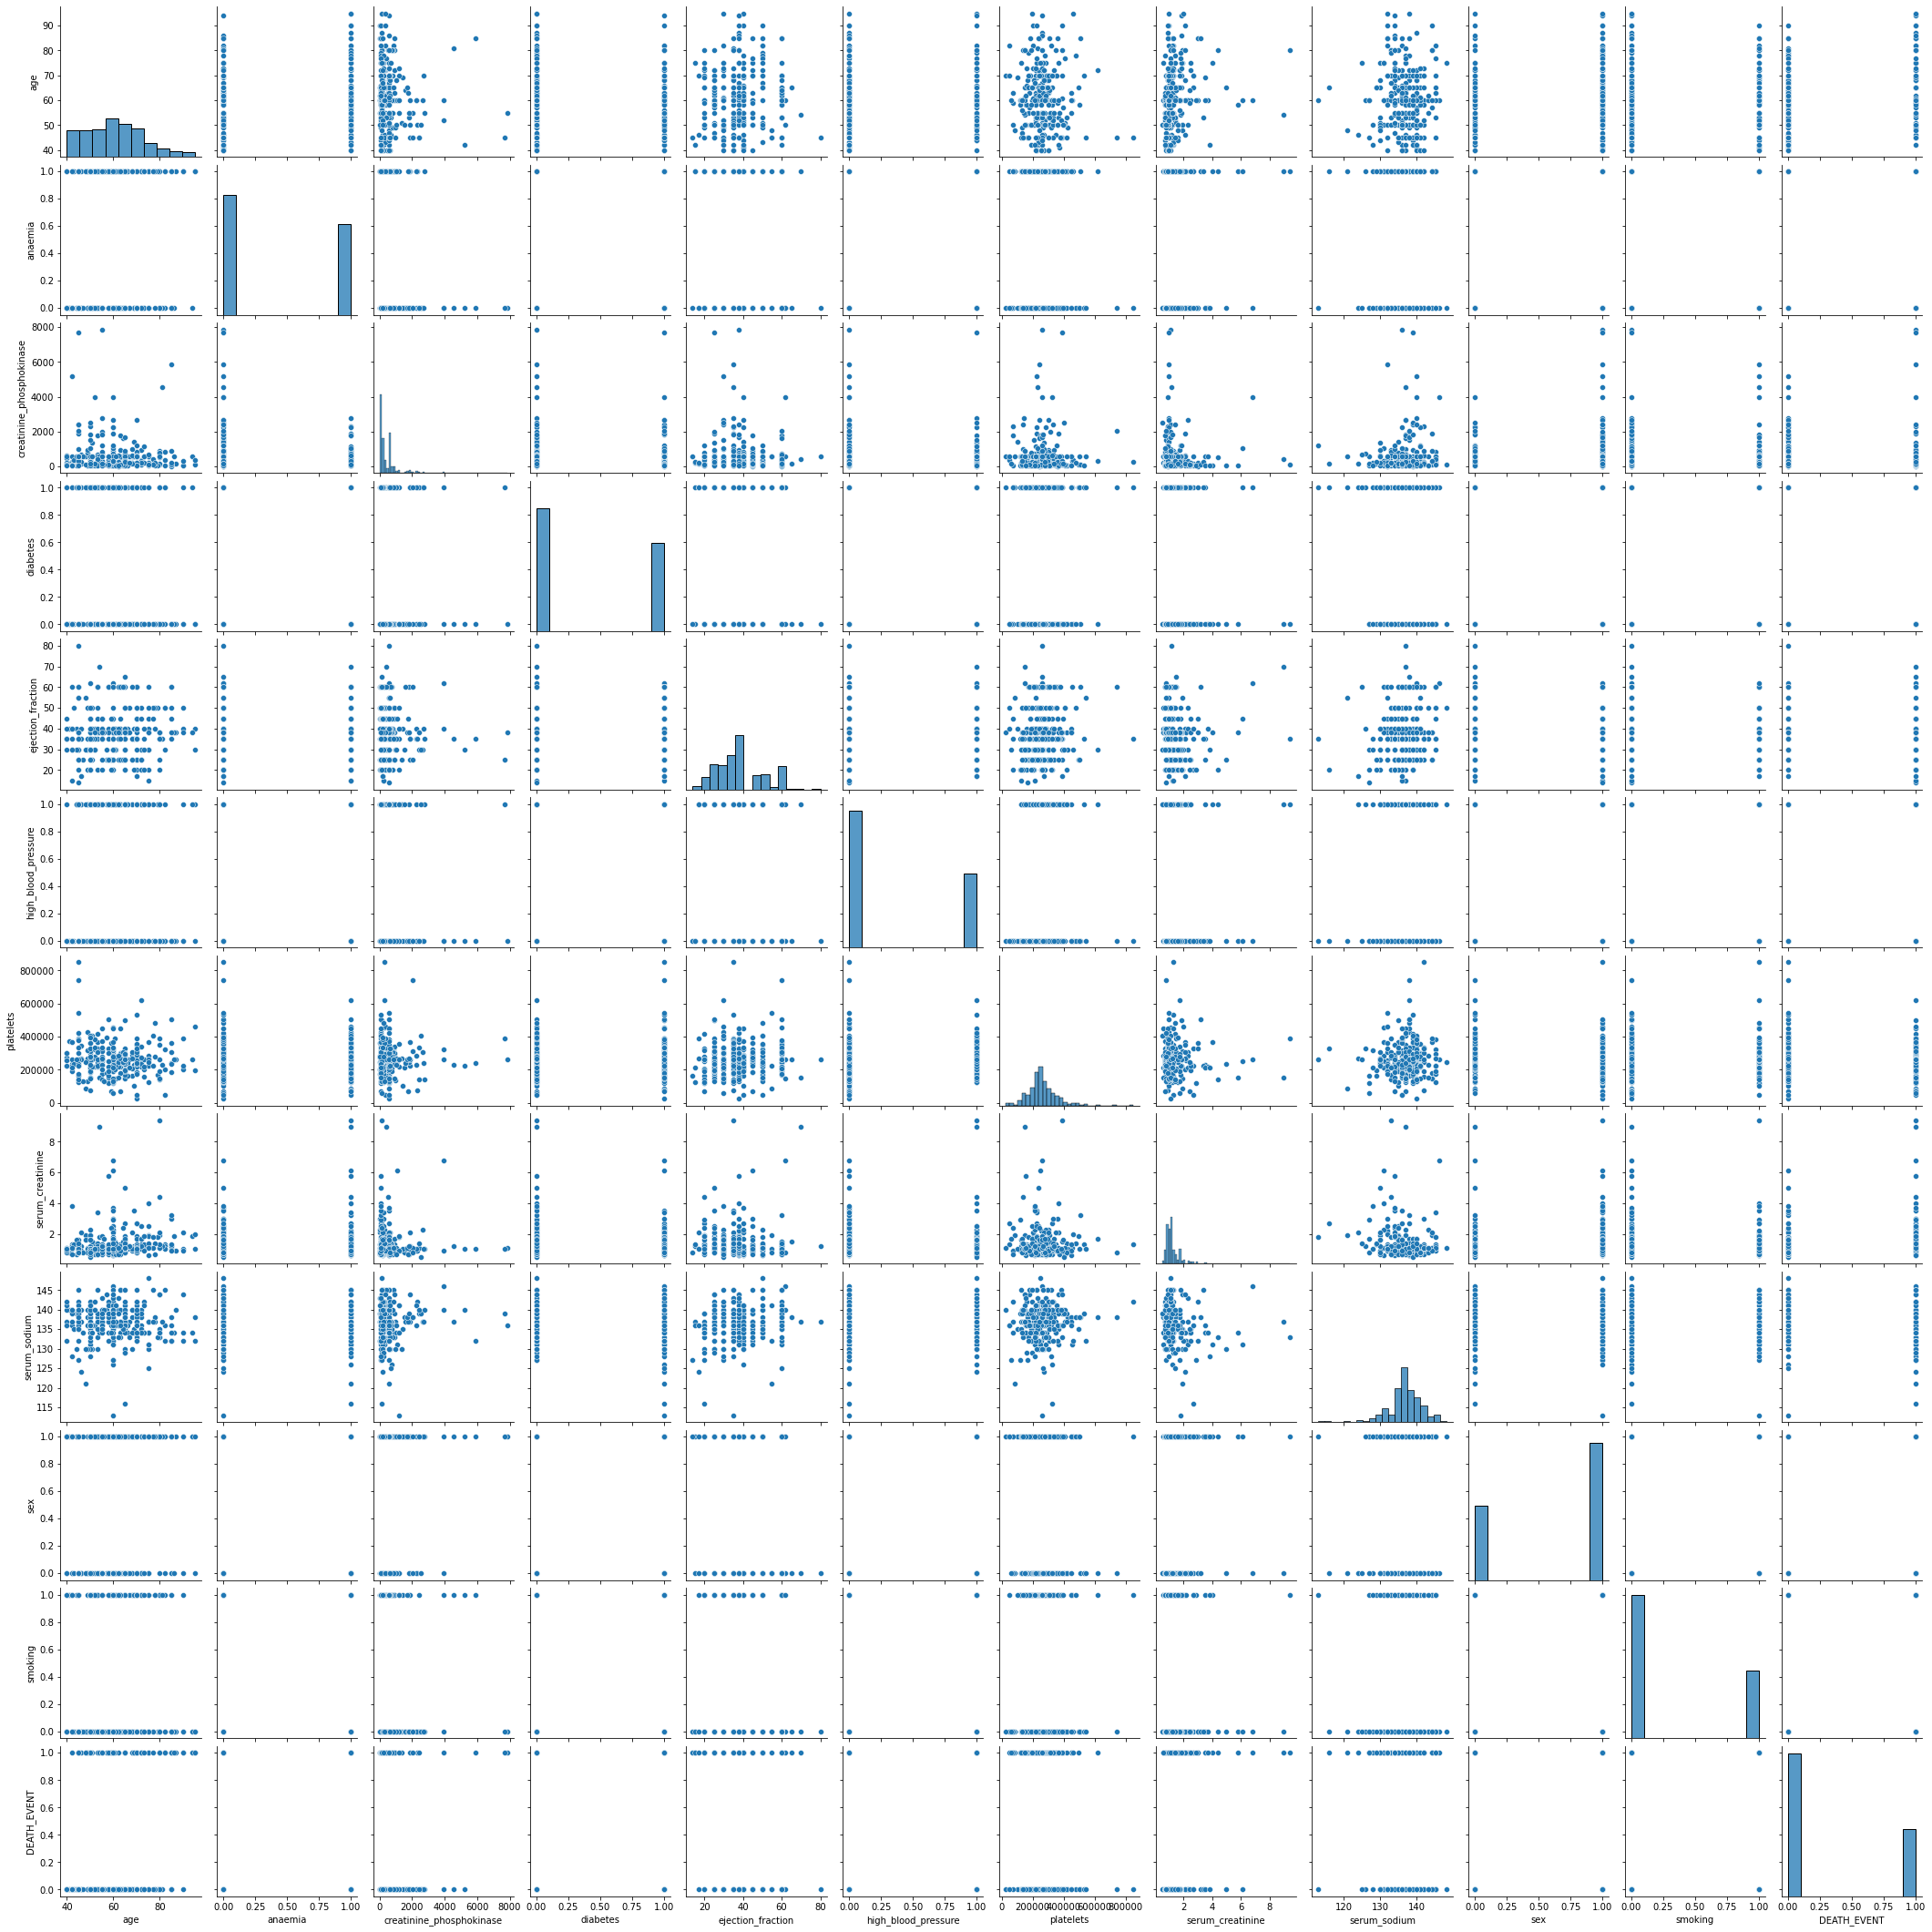

In [ ]:
sns.pairplot(data)

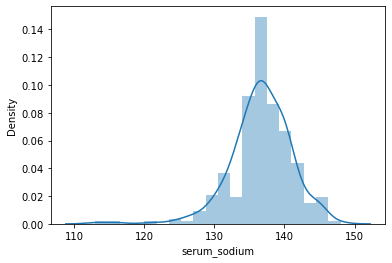

In [ ]:
sns.distplot(data.serum_sodium);


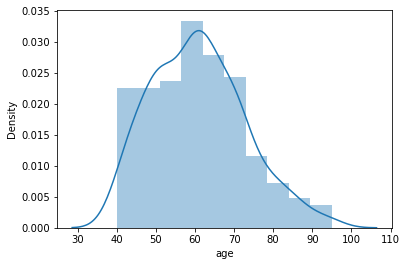

In [ ]:
sns.distplot(data.age);

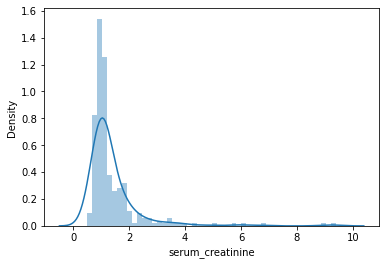

In [ ]:
sns.distplot(data.serum_creatinine);


## MODELING

Now, we are going to fit our data into a algoritjm/model .
For that we are gonna create a functio that will give us the accuracy of all models tha twe have chosen in one line!

In [ ]:
models = {"Logistic Regression":LogisticRegression(),
"KNN":KNeighborsClassifier(),
"Random Forest": RandomForestClassifier(),
         "SVC":SVC(),
          "Gradient_boosting":GradientBoostingClassifier(),
          "DecissionTree":DecisionTreeClassifier(),
         "lightgbm":lgb.LGBMClassifier(),
         "Xg boost":xgb.XGBClassifier()}
#the function!
def fit_and_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    model_scores={}
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_scores[name] = model.score(x_test,y_test)
    return model_scores
#splitting the data into test and tarin sets!
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.2)
x_t,x_te,y_t,y_te = train_test_split(x,y,test_size = 0.2)



In [ ]:
model_scores = fit_and_score(models = models,
x_train=x_train,
x_test=x_test,
y_train = y_train,
y_test = y_test)
print(model_scores)

[15:42:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'Logistic Regression': 0.7439024390243902, 'KNN': 0.6341463414634146, 'Random Forest': 0.9024390243902439, 'SVC': 0.5487804878048781, 'Gradient_boosting': 0.8658536585365854, 'DecissionTree': 0.8658536585365854, 'lightgbm': 0.8658536585365854, 'Xg boost': 0.9024390243902439}


Let's visualize it!

90.2439024390244


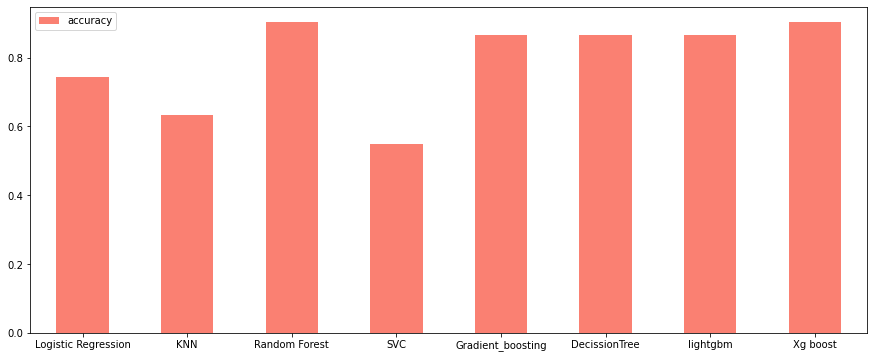

In [ ]:
model_compare = pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar(color=["salmon"],figsize=(15,6))
plt.xticks(rotation=0);
print(f"{max(model_scores.values())*100}")

## The models we will work with:
### 1.XG boost,
### 2.lightgbm,
### 3.Random forest,
### 4.Gradient boosting

## Hyperperameter tuning!

Let's see if we can improve our model's score.

### XG BOOST tuning

In [ ]:
## randomized search cv has been used to tune hyper parameter tuning

xg_grid = {"n_estimators":np.arange(200,800),
"learning_rate":[0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
"max_depth":[3,4,5,9,6],
"maximize" : [True],
'min_child_weight': [1, 5, 10,6],
"subsample":[0.8,0.884,0.9,1,0.7,0.5,2],
"gamma":[0.5,0.6,0.9,3,5,1,2,4],
"alpha":np.arange(0,5),
"objective":["reg:logistic","binary:logistic"],
"colsample_bytree":[0.1,1,0.5,0.3,2,5],
"booster":["gbtree","gblinear","dart"]}

In [ ]:
model =xgb.XGBClassifier()
rs_xg = RandomizedSearchCV(model,
param_distributions=xg_grid,
cv=5,
n_iter = 20,
n_jobs = -1,
verbose=True)
rs_xg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[15:43:18] WARNING: ..\src\learner.cc:541: 
Parameters: { maximize } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:43:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
       733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745,
       746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758,
       759, 760, 761, 762, 763, 764, 

In [ ]:
rs_xg.best_params_

{'subsample': 0.884,
 'objective': 'binary:logistic',
 'n_estimators': 614,
 'min_child_weight': 1,
 'maximize': True,
 'max_depth': 4,
 'learning_rate': 0.01,
 'gamma': 3,
 'colsample_bytree': 1,
 'booster': 'dart',
 'alpha': 4}

In [ ]:
rs_xg.best_estimator_

XGBClassifier(alpha=4, base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=4, maximize=True,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=614, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=4, reg_lambda=1, scale_pos_weight=1, subsample=0.884,
              tree_method='exact', validate_parameters=1, verbosity=None)

Let's fit and see how the model is wroking after tuning

In [ ]:
rs_xg.fit(x_train,y_train)
print(f"Before tuning:{model_scores['Xg boost']*100} after tuning:{rs_xg.score(x_test,y_test)*100}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[15:43:30] WARNING: ..\src\learner.cc:541: 
Parameters: { maximize } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Before tuning:90.2439024390244 after tuning:74.39024390243902


### Tuning Light gbm

In [ ]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
lgbm_grid={'objective': ['binary'],
             'metric': ['auc'],
             'is_unbalance':[True],
             'bagging_freq':[5],
             'boosting':['dart'],
             'num_boost_round':[300],
             'early_stopping_rounds':[30]}

estimator = lgb.LGBMClassifier()
rs_lgbm = RandomizedSearchCV(
    estimator, param_distributions=lgbm_grid, 
    n_iter=100,
    cv=5,
    scoring='roc_auc',
    random_state=314,
    verbose=True)

In [ ]:
rs_lgbm.fit(x_train,y_train)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=300, num_boost_round=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] early_stopping_round is set=30, early_stopping_rounds=30 will be ignored. Current value: early_stopping_round=30
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] num_iterations is set=300, num_boost_round=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] early_stopping_round is set=30, early_stopping_rounds=30 will be ignored. Current value: early_stopping_round=30
[Li

RandomizedSearchCV(cv=5, estimator=LGBMClassifier(), n_iter=100,
                   param_distributions={'bagging_freq': [5],
                                        'boosting': ['dart'],
                                        'early_stopping_rounds': [30],
                                        'is_unbalance': [True],
                                        'metric': ['auc'],
                                        'num_boost_round': [300],
                                        'objective': ['binary']},
                   random_state=314, scoring='roc_auc', verbose=True)

In [ ]:
rs_lgbm.best_params_

{'objective': 'binary',
 'num_boost_round': 300,
 'metric': 'auc',
 'is_unbalance': True,
 'early_stopping_rounds': 30,
 'boosting': 'dart',
 'bagging_freq': 5}

In [ ]:
print(f"Before tuning:{model_scores['lightgbm']*100} after tuning:{rs_lgbm.score(x_test,y_test)*100}")

Before tuning:86.58536585365853 after tuning:95.71683521713265


As we can see lightgbm is giving us a accuracy of 95% EXCEELENT!

## Tuning Ramdom forest

In [ ]:
rf_grid = {"n_estimators":np.arange(100,900),
"max_depth": [None,3,5,10,6,7],
"min_samples_split":np.arange(2,20),
"min_samples_leaf":np.arange(1,20),
"max_features":["auto","sqrt"]}
estimator = RandomForestClassifier()
rs_rf = RandomizedSearchCV(
    estimator, param_distributions=rf_grid, 
    n_iter=90,
    cv=5,
    verbose=True)


In [ ]:
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=90,
                   param_distributions={'max_depth': [None, 3, 5, 10, 6, 7],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'n_estimators': array([100, 101, 102, 103, 104, 105, 10...
       815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827,
       828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840,
       841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853,
       854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866,
       867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879,
       880, 881, 

In [ ]:
rs_rf.best_params_

{'n_estimators': 531,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10}

In [ ]:
print(f"Before tuning:{model_scores['Random Forest']*100} after tuning:{rs_rf.score(x_test,y_test)*100}")

Before tuning:90.2439024390244 after tuning:92.6829268292683


NICE! Random forest is giving us much better level of accuracy! 

## Tuning Gradient boosting

In [ ]:
gb_grid = {"n_estimators":np.arange(200,800),
"learning_rate":[0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
"max_depth":[3,4,5,9,6],
"subsample":[0.8,0.884,0.9,1,0.7,0.5,2],
"min_samples_leaf":[20,10,50,30],
"max_features":["sqrt"],
"max_depth":[5,6,7,8]}

estimator = GradientBoostingClassifier()
rs_gb = RandomizedSearchCV(
    estimator, param_distributions=gb_grid, 
    n_iter=90,
    cv=5,
    n_jobs = -1,
    verbose=True)
rs_gb.fit(x_train,y_train)


Fitting 5 folds for each of 90 candidates, totalling 450 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=90,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 0.2, 0.3],
                                        'max_depth': [5, 6, 7, 8],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [20, 10, 50, 30],
                                        'n_estimators': array([200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212,
       213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 2...
       720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732,
       733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745,
       746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758,
       759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771,
       772, 773, 774, 775, 776, 777, 778, 779, 

In [ ]:
rs_gb.best_params_

{'subsample': 0.9,
 'n_estimators': 795,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 8,
 'learning_rate': 0.01}

In [ ]:
print(f"Before tuning:{model_scores['Gradient_boosting']*100} after tuning:{rs_gb.score(x_test,y_test)*100}")

Before tuning:86.58536585365853 after tuning:87.8048780487805


Which one should we use?
Well as we can see 
our best model  so far is LIGHTGBM,Xgboost,Random_forest!


### Let's evaluate our model 

Let'S see which one's performence is better! XGBOOST vs RANDOMFOREST!

### XG boost evaluation

Cross validation !

We are gonna define a function which gonna plot the scores of cv!

In [ ]:
def cross_val_plot(model,x,y,CV):
    cv_acc = np.mean(cross_val_score(model,x,y,cv=CV,scoring="accuracy")*100)
    cv_acc_con = float(format(cv_acc,".2f"))
    
    cv_precision =np.mean(cross_val_score(model,x,y,cv=CV,scoring="precision")*100)
    cv_precision_con = float(format(cv_precision,".2f"))
    
    cv_f1 = np.mean(cross_val_score(model,x,y,cv=CV,scoring="f1")*100)
    cv_f1_con = float(format(cv_f1,".2f"))
    
    cv_recall = np.mean(cross_val_score(model,x,y,cv=CV,scoring="recall")*100)
    cv_recall_con = float(format(cv_recall,".2f"))
    
    empty_dict = {"accuracy":cv_acc_con,
                 "precision":cv_precision_con,
                 "f1":cv_f1_con,
                 "recall":cv_recall_con}
    score_dict = pd.DataFrame(empty_dict,index=["score"])
    ploting = score_dict.T.plot.bar()
    plt.title(f"Accuracy:{cv_acc_con},Precision:{cv_precision_con},f1:{cv_f1_con},recall:{cv_recall_con}")
    return ploting

[15:56:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:56:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:56:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:56:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

<AxesSubplot:title={'center':'Accuracy:84.25,Precision:78.96,f1:85.65,recall:94.15'}>

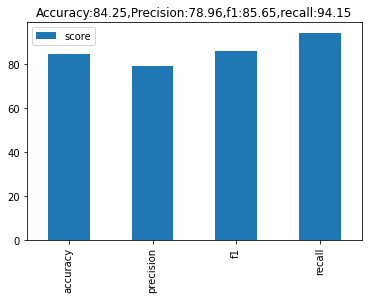

In [ ]:
model_xgb = xgb.XGBClassifier()
cross_val_plot(model_xgb,x_ros,y_ros,5)

## confusion matrix(XGB BOOST)

[15:56:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


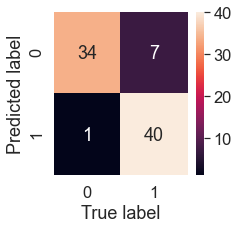

In [ ]:
model_xgb.fit(x_train,y_train)
y_preds_xgb = model_xgb.predict(x_test)
sns.set(font_scale=1.5)
def plot_conf_mat(y_test,y_preds):
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
    annot=True,
    cbar=True)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

plot_conf_mat(y_test,y_preds_xgb)

# ROC AUC

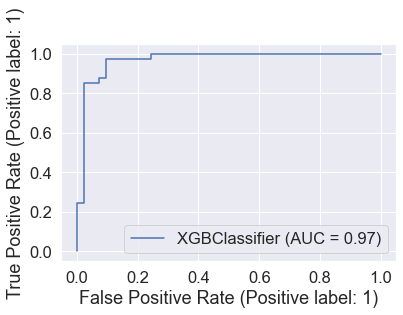

In [ ]:
plot_roc_curve(model_xgb,x_test,y_test);

## Classification  report

In [ ]:
print(classification_report(y_test,y_preds_xgb))

              precision    recall  f1-score   support

           0       0.97      0.83      0.89        41
           1       0.85      0.98      0.91        41

    accuracy                           0.90        82
   macro avg       0.91      0.90      0.90        82
weighted avg       0.91      0.90      0.90        82



## Random forest Evaluation!

In [ ]:
model_rf = RandomForestClassifier(n_estimators= 531,
 min_samples_split= 2,
 min_samples_leaf= 1,
 max_features= "sqrt",
 max_depth= 10)
model_rf.fit(x_train,y_train)
y_preds_rf = model_rf.predict(x_test)

Cross validation of random forest

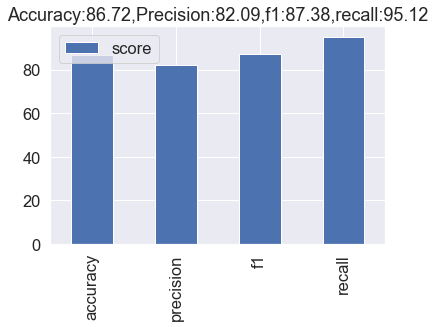

In [ ]:
cross_val_plot(model_rf,x_ros,y_ros,5);

Confusion matrix of random forest

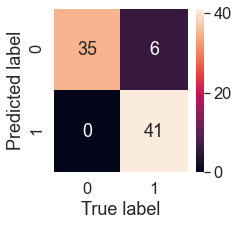

In [ ]:
plot_conf_mat(y_test,y_preds_rf)

ROC/AUC curve of random forest 

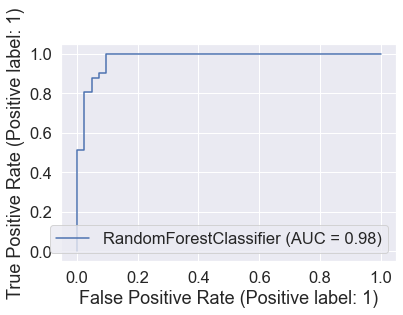

In [ ]:
plot_roc_curve(model_rf,x_test,y_test);

WOAH! our Random forest classifier is doing best!

Classification report of Random forest classifier

In [ ]:
print(classification_report(y_test,y_preds_rf))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        41
           1       0.87      1.00      0.93        41

    accuracy                           0.93        82
   macro avg       0.94      0.93      0.93        82
weighted avg       0.94      0.93      0.93        82



### As we can see our Random forest classifier is doing great ! So we can say that we will choose RFclassifier over xgboost!

### Let's see how well our lightgbm is doing!

In [ ]:
clf_lgbm = lgb.LGBMClassifier(bagging_freq=5, boosting='dart', early_stopping_rounds=30,
               is_unbalance=True, metric='auc', num_boost_round=300,
               objective='binary')
clf_lgbm.fit(x_train,y_train)
clf_lgbm.score(x_test,y_test)*100


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] early_stopping_round is set=30, early_stopping_rounds=30 will be ignored. Current value: early_stopping_round=30
[LightGBM] [Warning] num_iterations is set=300, num_boost_round=300 will be ignored. Current value: num_iterations=300


90.2439024390244

[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] early_stopping_round is set=30, early_stopping_rounds=30 will be ignored. Current value: early_stopping_round=30
[LightGBM] [Warning] num_iterations is set=300, num_boost_round=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] early_stopping_round is set=30, early_stopping_rounds=30 will be ignored. Current value: early_stopping_round=30
[LightGBM] [Warning] num_iterations is set=300, num_boost_round=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt 

[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] early_stopping_round is set=30, early_stopping_rounds=30 will be ignored. Current value: early_stopping_round=30
[LightGBM] [Warning] num_iterations is set=300, num_boost_round=300 will be ignored. Current value: num_iterations=300
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] early_stopping_round is set=30, early_stopping_rounds=30 will be ignored. Current value: early_stopping_round=30
[LightGBM] [Warning] num_iterations is set=300, num_boost_round=300 will be ignored. Current value: num_iterations=300


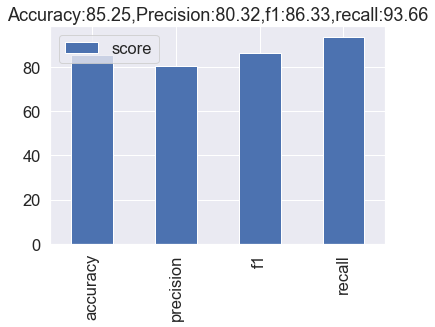

In [ ]:
cross_val_plot(clf_lgbm,x_ros,y_ros,5);

In [ ]:
y_preds_lgbm = clf_lgbm.predict(x_test)

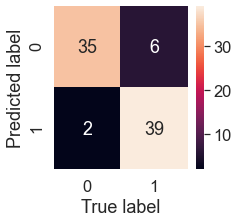

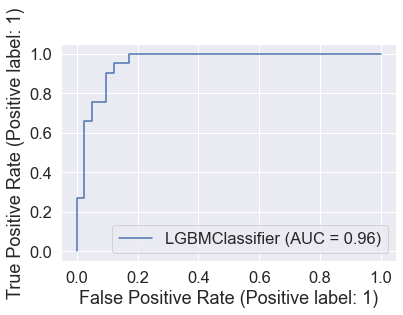

In [ ]:
plot_conf_mat(y_test,y_preds_lgbm);plot_roc_curve(clf_lgbm,x_test,y_test);


In [ ]:
print(f"LGBM:{classification_report(y_test,y_preds_lgbm)}"),print(f"RANDOM FOREST:{classification_report(y_test,y_preds_rf)}")

LGBM:              precision    recall  f1-score   support

           0       0.95      0.85      0.90        41
           1       0.87      0.95      0.91        41

    accuracy                           0.90        82
   macro avg       0.91      0.90      0.90        82
weighted avg       0.91      0.90      0.90        82

RANDOM FOREST:              precision    recall  f1-score   support

           0       1.00      0.85      0.92        41
           1       0.87      1.00      0.93        41

    accuracy                           0.93        82
   macro avg       0.94      0.93      0.93        82
weighted avg       0.94      0.93      0.93        82



(None, None)

Random forest:None
LGBM:None


(None, None)

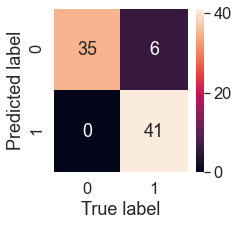

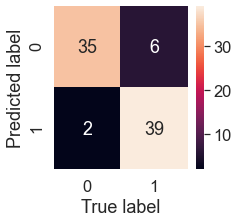

In [ ]:
print(f"Random forest:{plot_conf_mat(y_test,y_preds_rf)}"),print(f"LGBM:{plot_conf_mat(y_test,y_preds_lgbm)}")

## We have choosen RANDOM FOREST CLASSIFIER as our best estimator!

In [ ]:
final_model = RandomForestClassifier(n_estimators= 531,
 min_samples_split= 2,
 min_samples_leaf= 1,
 max_features= "sqrt",
 max_depth= 10)

In [ ]:
final_model.fit(x_train,y_train)
train_score=final_model.score(x_train,y_train)*100
test_score = final_model.score(x_test,y_test)*100
print(f"The test score is:{test_score}")
print(f"The train score is:{train_score}")

The test score is:92.6829268292683
The train score is:99.69135802469135


## Let's save our model!

In [ ]:
dump(final_model, 'Heart_attack_algorithm.joblib')

['Heart_attack_algorithm.joblib']

# Thank you!